## Imports

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

## Directory, Image-Name & Image-Size Definitions

In [42]:
model_dir = '/home/drevital/cs_video_processor/models/3_class'
obs_im_dir = '/home/drevital/obstacles_classification_datasets/3_class/pairs/obstacle_2'
obs_im_name = 'y13_5_433_.89_2021-07-27--16-48-11_.jpg'
no_obs_im_dir = '/home/drevital/obstacles_classification_datasets/3_class/pairs/no_obstacle_2'
no_obs_im_name = 'y33_1_63__crop_23_flip_hr_.jpg'
sdv_im_dir = '/home/drevital/obstacles_classification_datasets/3_class/pairs/SDV_1'
sdv_im_name = 'y18_2_388__flip_hr.jpg'
im_height = 200
im_width = 200

## Load Trained Model

In [43]:
model = tf.keras.models.load_model(model_dir)

## Read Images

In [44]:
im_rgb = cv2.imread(os.path.join(sdv_im_dir, sdv_im_name))
im = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2GRAY)  

## Display Images

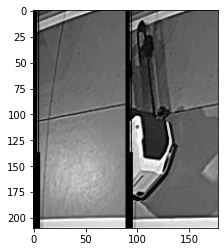

In [45]:
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show() 

## Prepare Images for Prediction

In [46]:
w = im.shape[1]
im1 = im[:,:w//2]
im2 = im[:,w//2:]
const = np.full((im1.shape[0]*im1.shape[1]), 127, dtype=np.uint8)
const = const.reshape((im1.shape[0], im1.shape[1], 1))
gg2const = cv2.merge([const, im2, im1])
gg2const = Image.fromarray(gg2const)
gg2const = gg2const.resize([im_width, im_height])
gg2const = np.asarray(gg2const)
gg2const = gg2const.astype('float32')
gg2const = gg2const/255
gg2const = gg2const.reshape(1, im_width, im_height, 3)

## Predict 

In [47]:
prediction = model.predict(gg2const)

## Show Prediction

In [48]:
prediction

array([[9.910533e-01, 4.994455e-04, 8.447290e-03]], dtype=float32)

In [ ]:
onehot = 